#Balancing an Imbalanced Dataset by Synthetc Data Generation using TVAE

The main aim is to balance the binary dataset by generation of synthetic data.
In order to generate synthetic data we have used TVAE model.

# Importing Data

Here we are using Credit Card Dataset that is available on Kaggle.The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions

Link : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# mounting drive
# can be changed as per need
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# path to dataset
# can be changed as per need
# path to csv file
path='/content/drive/MyDrive/EXTRAS/creditcard.csv'
df=pd.read_csv(path)

# Data Exploration
Lets perform some initial explorations on our dataset

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Exploring the Dataset

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# counting fraud and no fraud classes
no_f=df['Class'].value_counts()[0]/len(df)*100
f=df['Class'].value_counts()[1]/len(df)*100
print("No Fraud cases =",no_f,"\nFraud cases =",f)

No Fraud cases = 99.82725143693798 
Fraud cases = 0.1727485630620034


So we see that via above our data is highly imbalanced for only about 0.17 percent are Fraud Classes

## Visualisations using Distributions
Lets add some visuals to aid our understanding of the dataset

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

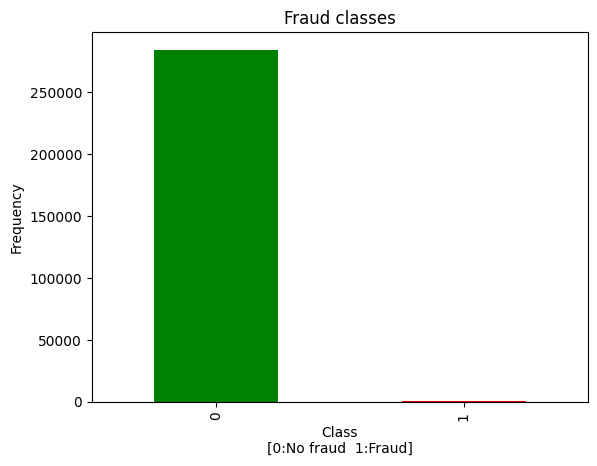

In [10]:
# creating a bar graph
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Fraud classes")
plt.xlabel("Class\n[0:No fraud  1:Fraud]")
plt.ylabel("Frequency")
plt.show()

In [11]:
# using seaborn
import seaborn as sns

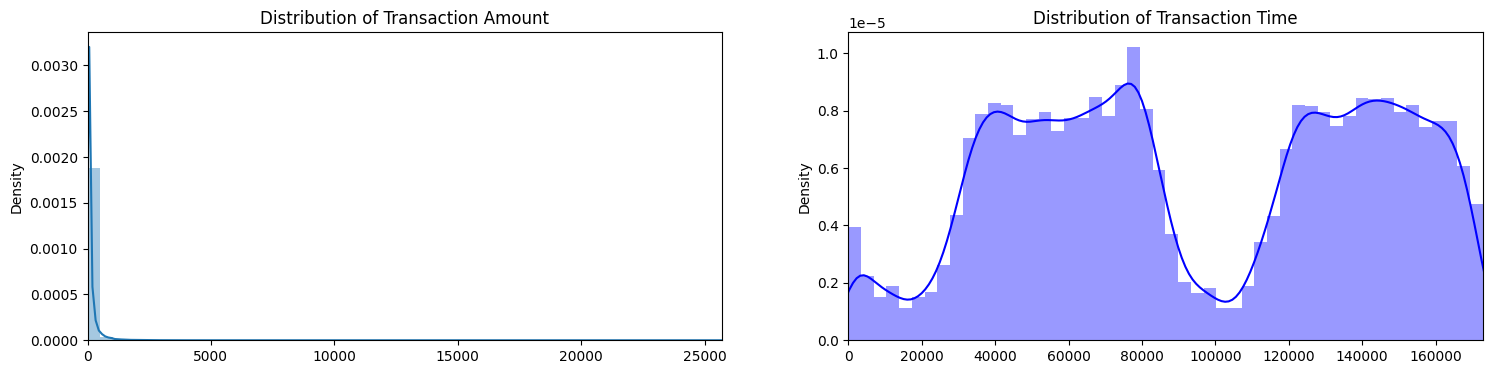

In [12]:
# creating a displot
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amt_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amt_val, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlim([min(amt_val), max(amt_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

We see that our dataset is highly imbalanced. Lets try to balance the classes by generating synthetic data.


## Separating class 1 and class 2 into two dataset

In [13]:
class1_data=df[df.Class == 1]
class0_data=df[df.Class == 0]

In [14]:
class1_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [15]:
class0_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


We see that is is a wide variation in our dataset. Lets normalize it.

In [16]:
# normalization of data using z scores

df_1 = class1_data.copy()
df_2 = class0_data.copy()
# apply normalization techniques
for column in df_1.columns:
    if column == 'Class':
      df_1[column] = df_1[column]
    else:
      df_1[column] = (df_1[column] -
                           df_1[column].mean()) / df_1[column].std()

for column in df_2.columns:
    if column == 'Class':
      df_2[column] = df_2[column]
    else:
      df_2[column] = (df_2[column] -
                           df_2[column].mean()) / df_2[column].std()




In [17]:
df_1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-1.679527,0.362594,-0.389583,0.762689,-0.189371,0.489354,-0.015504,0.420624,0.120777,-0.075559,...,-0.050747,-0.032850,-0.268987,0.824957,0.003851,0.267537,0.065785,-0.400049,-0.476117,1
623,-1.678148,0.254789,-1.580225,1.142148,-0.784245,0.839657,0.179167,0.817884,-0.093917,0.923737,...,-0.013411,0.281967,0.896579,-0.365945,0.298981,-0.417678,-0.307495,-0.072910,1.584788,1
4920,-1.594737,0.363902,-0.434499,0.938489,-0.769767,0.433618,0.711443,0.850735,-0.142661,0.936812,...,-0.260449,-0.633239,0.134862,0.034526,-0.247820,-1.259916,-0.095157,-0.417869,0.458615,1
6108,-1.541972,0.055128,-0.527918,0.624452,-0.648116,0.376567,-0.166189,0.287581,-0.120540,0.933008,...,-0.036186,0.109005,-0.250626,0.100137,0.264620,-1.503429,-0.724677,1.414066,-0.246262,1
6329,-1.530830,0.885386,-0.140761,0.383731,0.066392,1.261138,0.021522,1.010463,-0.156961,0.519120,...,-0.282391,-0.480549,-0.390276,-2.962747,1.815660,1.092161,-0.131170,0.129959,-0.472221,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,1.847905,0.419251,-0.582149,0.353674,-0.971955,0.294974,-0.329772,0.650205,0.018620,0.206397,...,0.016798,-0.222961,0.430304,-0.368044,0.622241,1.561967,0.088690,0.132106,1.043265,1
280143,1.852190,0.906661,-0.543994,0.285340,-1.089395,0.668930,0.038319,0.576619,-0.047384,0.581283,...,-0.088640,0.009491,-0.066681,0.046707,0.602638,1.458236,0.158761,0.202761,-0.473156,1
280149,1.852274,0.603773,-0.581982,0.677770,-1.417776,0.377980,0.750429,0.462619,0.094077,0.771273,...,0.009882,0.548681,0.146395,0.266111,-0.979853,0.889297,0.155824,0.216876,-0.172669,1
281144,1.865130,0.244427,-0.707938,0.229724,-0.948359,0.430083,-0.831920,0.466329,0.071802,0.379380,...,-0.033678,-0.189520,-0.263224,-0.152313,-0.463641,1.175519,0.518825,-0.601814,0.478366,1


In [18]:
df_2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.997266,-0.708910,-0.040651,1.729564,0.990483,-0.253343,0.345864,0.195079,0.085841,0.329842,...,-0.023819,0.383963,-0.177854,0.110183,0.247009,-0.391973,0.334762,-0.063483,0.245213,0
1,-1.997266,0.613323,0.166502,0.105733,0.325879,0.040211,-0.063748,-0.075024,0.074133,-0.238570,...,-0.313279,-0.882514,0.162850,-0.561310,0.321204,0.261247,-0.021728,0.045074,-0.342260,0
2,-1.997245,-0.708157,-0.815265,1.206663,0.277017,-0.374848,1.352029,0.663231,0.214128,-1.394492,...,0.347730,1.066377,1.463045,-1.138148,-0.629128,-0.288252,-0.137697,-0.180905,1.160988,0
3,-1.997245,-0.504986,-0.109376,1.220219,-0.611314,-0.011616,0.935989,0.193392,0.325867,-1.277333,...,-0.149378,0.007321,-0.306320,-1.940910,1.243482,-0.460018,0.157606,0.186876,0.140777,0
4,-1.997224,-0.604458,0.540299,1.052841,0.293635,-0.304098,0.070307,0.494824,-0.232110,0.746552,...,-0.011435,1.103133,-0.221269,0.232900,-0.395522,1.041764,0.549504,0.653227,-0.073173,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641559,-6.160892,6.159631,-6.747128,-1.471269,-3.957345,-1.961975,-4.180354,6.291592,1.753269,...,0.299534,0.154612,1.632088,-0.841120,2.759656,0.518669,2.360772,2.499809,-0.349937,0
284803,1.641580,-0.383999,-0.029832,1.386062,-0.522198,0.635819,0.794034,0.012464,0.254767,0.532723,...,0.300582,1.277391,0.019940,-1.677860,-1.164939,-0.819436,0.171985,-0.162019,-0.253897,0
284804,1.641601,0.990410,-0.180291,-2.234991,-0.393022,1.934529,2.277473,-0.259976,0.610880,0.392875,...,0.325472,0.799058,-0.060447,1.056416,0.510526,-0.180991,0.011879,-0.080195,-0.081610,0
284805,1.641601,-0.128871,0.328060,0.473020,0.498565,-0.282556,0.467165,-0.590269,0.585674,0.355820,...,0.371792,1.105580,-0.262843,0.203084,-1.092983,1.133785,0.272894,0.317577,-0.313033,0


In [19]:
class1_data = df_1
class0_data = df_2

# TVAE Model
Here we are using TVAE model for generation of synthetic data. The source code for this model is available on the link given below

Link: https://github.com/sdv-dev/SDV

In [20]:
# importing needed libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler


In [21]:
# creating float Tensor for our dataset
class CreditCardFraudDataset(Dataset):
    def __init__(self, features):
        self.features = torch.FloatTensor(features)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index]


In [22]:
# defining the TVAE model architecture
class TVAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(TVAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim * 2)  # The last layer outputs mean and log variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
            nn.Sigmoid()  # Output is scaled between 0 and 1
        )
        self.dropout = nn.Dropout(p=0.2)  # Dropout layer

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        latent_stats = self.encoder(x)
        mu, logvar = torch.chunk(latent_stats, 2, dim=1)
        z = self.reparameterize(mu, logvar)
        reconstructed = self.decoder(z)
        return reconstructed, mu, logvar

In [23]:
# training function
def working(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for inputs in dataloader:
        inputs = inputs.to(device)
        optimizer.zero_grad()
        reconstructed, mu, logvar = model(inputs)
        loss = criterion(reconstructed, inputs, mu, logvar)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(dataloader.dataset)
    return epoch_loss

In [24]:
# loss function
def tvae_loss(reconstructed, inputs, mu, logvar):
    reconstruction_loss = nn.BCELoss(reduction='sum')(reconstructed, inputs)
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence



In [25]:
# manuel seeding
torch.manual_seed(42)
np.random.seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [48]:
# function to call the model and train it
def train_model(df):
  # spliting the dataset into features and labels
  features = df.drop("Class", axis=1).values
  labels = df["Class"].values

    # performing feature scaling on the features
  scaler = StandardScaler()
  features = scaler.fit_transform(features)
    # creating the Credit Card Fraud dataset

  dataset = CreditCardFraudDataset(features)

  # creating a data loader for the dataset
  batch_size = 64
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

  # initializing the TVAE model
  input_dim = features.shape[1]
  hidden_dim = 256
  latent_dim = 10
  tvae_model = TVAE(input_dim, hidden_dim, latent_dim).to(device)


  lr = 0.001
  num_epochs = 10
  weight_decay = 1e-5


  optimizer = optim.Adam(tvae_model.parameters(), lr=lr,weight_decay=weight_decay)
  criterion = tvae_loss

  for epoch in range(num_epochs):
      print(f"Epoch {epoch+1}/{num_epochs}")
      epoch_loss = working(tvae_model, dataloader, optimizer, criterion, device)
      print(f"Loss: {epoch_loss:.4f}")



In [37]:
# function for synthetic data generator
def generator(input_dim,no):
  num_samples = no
  latent_dim = 10
  tvae_model = TVAE(input_dim, 256, latent_dim).to(device)
  latent_samples = torch.randn(num_samples, latent_dim).to(device)
  synthetic_data = tvae_model.decoder(latent_samples).detach().cpu()
  return synthetic_data


# Applying 10 fold cross-validation on original dataset and training the model using the same



 Now we wil use 10 fold cross-validation on our dataset. For each fold existing Class 0 and Class 1 are divided into 10 equal parts. One part is used for testing and the remaining 9 parts are used to train the TVAE model.

In [38]:
class1_data = df_1
class0_data = df_2

In [39]:
class0=np.array_split(class0_data,10)
class1=np.array_split(class1_data,10)

In [40]:
# creating the data
data=[]
for i in range(10):
  df1 = class0[i]
  df2 = class1[i]
  x = pd.concat([df1, df2])
  x=x.sample(frac = 1)
  data.append(x)

In [41]:
#viewing a part of our data
data[0]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8895,-1.740485,0.627845,-0.010077,0.605610,0.376919,-0.689278,-0.758897,-0.219890,-0.230278,1.806974,...,-0.311198,-0.198797,0.017727,1.619177,0.692644,2.152925,-0.227560,0.001741,-0.313432,0
6491,-1.833737,0.604217,0.057225,0.039129,1.249208,1.320998,3.350934,-1.046833,0.933175,1.155965,...,-0.398892,-0.813409,0.027548,1.537374,0.829651,-0.138958,0.044546,0.071395,-0.331345,0
15546,-1.430001,-0.580358,-0.168069,1.081419,-1.851885,-0.035815,-0.089167,0.149407,0.073588,1.375823,...,0.134095,0.450700,-0.724980,-1.568610,1.330272,0.221092,-0.212834,0.343048,-0.037148,0
1089,-1.979597,0.247734,-0.646262,1.327801,2.363781,-1.195979,0.820137,-0.696649,0.294018,0.934515,...,0.344527,0.782868,-0.606673,0.803634,0.745067,0.449980,0.110506,0.278496,0.819851,0
28440,-1.259923,-0.411531,0.349719,1.723965,1.195731,-0.563686,0.739493,0.587520,0.031380,0.626127,...,-0.548058,-0.487722,-0.017438,0.710452,-0.190279,-0.893543,0.506893,-0.182769,0.138938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16890,-1.401950,0.477037,-0.355842,0.363032,0.120443,-0.773845,-0.563238,-0.151690,-0.003635,0.167310,...,0.017660,-0.535700,-0.015841,0.947587,-0.048652,1.720718,-0.267189,0.079878,0.256448,0
25548,-1.288375,-0.057658,0.705024,-1.177400,-0.134971,1.881506,2.304574,0.059365,0.999299,-0.759091,...,0.173851,0.402817,0.058965,1.658584,-1.015173,-0.823782,0.791351,0.490802,-0.333064,0
24118,-1.300652,0.631212,-0.160121,-0.213771,0.117729,1.140538,3.047297,-0.987167,0.942433,0.695847,...,-0.167751,-0.378686,-0.051125,1.651383,1.109006,-0.813819,0.192147,0.090907,-0.352976,0
26104,-1.283131,0.566757,-0.110472,0.105961,0.500463,-0.201912,-0.131171,-0.013506,0.018161,0.405908,...,-0.234750,-0.727308,-0.066784,-0.447545,0.683136,0.638716,-0.079877,0.045318,-0.069255,0


In [42]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, cohen_kappa_score, average_precision_score, accuracy_score
from sklearn.model_selection import cross_validate

In [43]:
# defining random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

In [44]:
# performing cross-validation and calculate evaluation metrics

for fold in range(10):
    print(f"Fold {fold+1}:")
    print("Training the TVAE model ...............")

    test = data[fold]
    train=pd.DataFrame()
    for i in range(10):
      if i != fold:
        train = pd.concat([train,data[i]])
    train=train.sample(frac=1)
    no =  pd.value_counts(train['Class'])[0]-pd.value_counts(train['Class'])[1]

    #training the model and generate samples
    features = df.drop("Class", axis=1).values


    samples = train_model(train)
    samples=generator(features.shape[1],no)



    # balancing the train
    arr=samples.numpy()
    samples=pd.DataFrame(arr)
    samples['Class']=[1]*no
    samples.columns=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
    new_data=pd.concat([train,samples])
    new_data=new_data.sample(frac=1)



    # generation of data
    x_train = new_data.drop('Class', axis=1).values.astype(float)
    y_train = new_data['Class'].values.astype(float)

    x_test = test.drop('Class', axis=1).values.astype(float)
    y_test = test['Class'].values.astype(float)




    # testing

    rf_classifier.fit(x_train,y_train)
    pred = rf_classifier.predict(x_test)


    # calculating the evaluation metrics
    f1 = f1_score(y_test, pred, average='macro')
    kappa = cohen_kappa_score(y_test, pred)
    avg_precision = average_precision_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)

    # printing the evaluation metrics for the fold
    print(f"  F1-Score: {f1}")
    print(f"  Kappa-Score: {kappa}")
    print(f"  Average Precision Score: {avg_precision}")
    print(f"  Accuracy: {accuracy}")
    print()

    # printing a fold for reference
    if fold == 9:
      print(new_data)


Fold 1:
Training the TVAE model ...............
Epoch 1/10
Loss:  0.026890800865801756
Epoch 2/10
Loss:  0.036173628055591
Epoch 3/10
Loss:  0.039079342131867464
Epoch 4/10
Loss:  0.041014272179966
Epoch 5/10
Loss:  0.03886007603498528
Epoch 6/10
Loss:  0.043300564702736584
Epoch 7/10
Loss:  0.044106434351533164
Epoch 8/10
Loss:  0.04471628389565668
Epoch 9/10
Loss:  0.04524886049561904
Epoch 10/10
Loss:  22696.489640441807
  F1-Score: 0.9504703268879592
  Kappa-Score: 0.9009422041130521
  Average Precision Score: 0.820315989045713
  Accuracy: 0.9996840109542869

Fold 2:
Training the TVAE model ...............
Epoch 1/10
Loss:  0.026104327704285675
Epoch 2/10
Loss:  0.03557573313685152
Epoch 3/10
Loss:  0.03847641627489649
Epoch 4/10
Loss:  0.0400224041078983
Epoch 5/10
Loss:  0.04102779738348875
Epoch 6/10
Loss:  0.041749088567093355
Epoch 7/10
Loss:  0.04230051198358674
Epoch 8/10
Loss:  0.04280871591343978
Epoch 9/10
Loss:  0.0430837222259034
Epoch 10/10
Loss:  0.04345459699882999
 

In [45]:
# viewing a part of new data
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
31640,0.513607,0.592214,0.504059,0.544983,0.438015,0.424005,0.440335,0.458997,0.562869,0.616669,...,0.412083,0.497166,0.577006,0.504659,0.592445,0.537166,0.449370,0.483823,0.481912,1
247151,1.234959,0.250352,-2.401312,-1.421212,-1.200315,-1.106386,0.186484,0.248028,-0.190668,0.619535,...,-0.294242,-2.600770,-0.555454,0.150190,-1.388876,-1.595290,-0.298341,0.328955,3.172782,0
62268,-0.939984,-0.465583,0.531126,1.313065,1.120949,-0.502546,0.904167,-0.302839,0.746093,0.119460,...,-0.267622,-0.342808,0.036586,0.067237,-0.770004,-0.967021,-0.020907,0.204917,-0.237864,0
174532,0.317019,0.576163,0.548713,0.674238,0.657785,0.582048,0.362770,0.353751,0.379695,0.475769,...,0.455719,0.502381,0.450713,0.487814,0.573661,0.431536,0.445812,0.556189,0.541341,1
29559,0.448929,0.608072,0.565582,0.519497,0.535960,0.550744,0.471718,0.511870,0.477324,0.562163,...,0.518644,0.441784,0.525512,0.489238,0.556955,0.406349,0.536281,0.558827,0.428881,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182281,0.449590,0.513898,0.509301,0.486852,0.566074,0.492443,0.485028,0.545612,0.476037,0.580407,...,0.492247,0.509689,0.479265,0.499734,0.590182,0.466573,0.513263,0.440473,0.509697,1
241638,0.435390,0.582370,0.638306,0.551829,0.488681,0.519002,0.540433,0.405160,0.495290,0.535100,...,0.583050,0.510582,0.523509,0.379597,0.653028,0.431364,0.506998,0.644205,0.361333,1
34560,0.402707,0.505691,0.544349,0.533023,0.600774,0.526585,0.470641,0.431797,0.336975,0.501513,...,0.481933,0.559966,0.469974,0.494419,0.582458,0.514288,0.533116,0.574269,0.484422,1
33912,-1.208895,0.564799,-0.444989,0.515925,-0.848696,-0.990592,-0.648149,-0.412075,-0.120085,1.624579,...,0.252565,0.875104,-0.317503,0.826047,0.938555,0.209830,0.088776,0.125923,0.023026,0


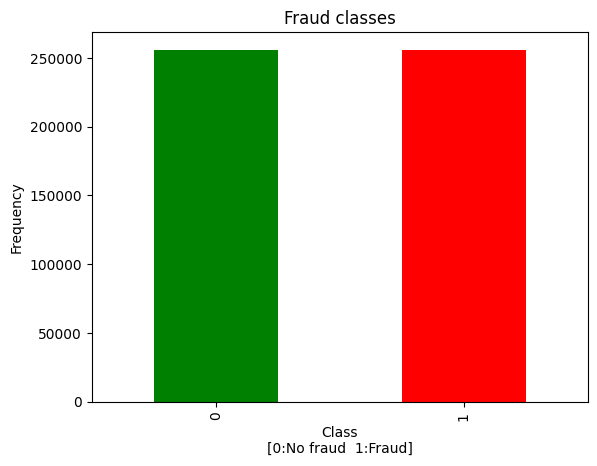

In [47]:
# creating a bar graph
df = new_data
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Fraud classes")
plt.xlabel("Class\n[0:No fraud  1:Fraud]")
plt.ylabel("Frequency")
plt.show()

We now see that our dataset is balanced.